# generate Mobile UI Designs.

# Install Required Packages

In [1]:
pip install transformers diffusers


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large")
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")


C:\Users\LENOVO\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\LENOVO\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\LENOVO\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `le

# Generating Text

In [3]:
def generate_text_prompt(input_text):
    inputs = tokenizer(input_text, return_tensors="pt")
    outputs = model.generate(**inputs, max_length=100)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

user_input = "Design a mobile UI for a music app"
generated_prompt = generate_text_prompt(user_input)
print(generated_prompt)



UI for a mobile app for music


# Image Generation

In [4]:
from diffusers import StableDiffusionPipeline



# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe = pipe.to("cpu")  # Switch to CPU if CUDA is not available

# Generate image from the prompt
image = pipe(generated_prompt).images[0]
image.save("generated_ui_design.png")


C:\Users\LENOVO\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

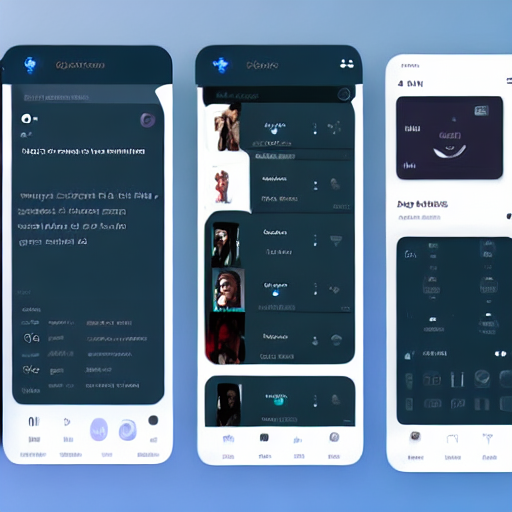

In [5]:
display(image)


Enter a description for the mobile UI design (or type 'exit' to quit): black phone
Generated prompt: samsung galaxy s4


  0%|          | 0/50 [00:00<?, ?it/s]

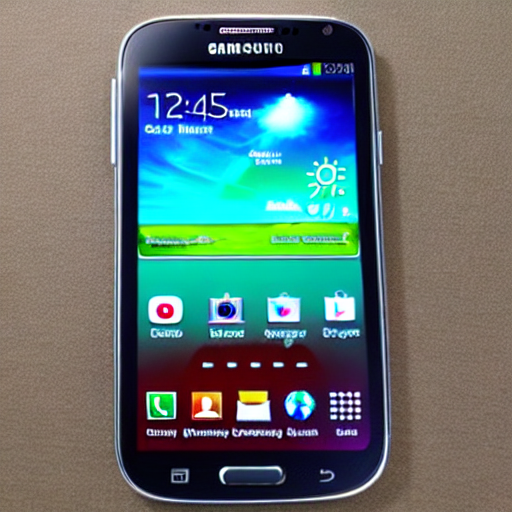

Image saved as 'generated_ui_design.png'
Enter a description for the mobile UI design (or type 'exit' to quit): exit


In [9]:
while True:
    user_input = input("Enter a description for the mobile UI design (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    
    generated_prompt = generate_text_prompt(user_input)
    print(f"Generated prompt: {generated_prompt}")
    
    # Generate and save the image
    image = pipe(generated_prompt).images[0]
    image.save("generated_ui_design.png")
    display(image)
    print("Image saved as 'generated_ui_design.png'")
